# Insect Recognizer

## Introduction

This notebook is the starting point for insect recognizer.

## Data Importing

In [ ]:
# Link for downloaiding the dataset: https://zenodo.org/records/12554005
# After unzipping the dataset the full images can be found in the "\ami_traps\ami_traps_dataset\images" folder


import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np

data_dir = r"C:\Users\ruben\Downloads\ami_traps\ami_traps_dataset\images"


### Collect all valid image files

In [8]:
valid_exts = (".jpg", ".jpeg", ".png", ".bmp", ".tif", ".tiff")
image_paths = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.lower().endswith(valid_exts)]
print(f"✅ Found {len(image_paths)} images in {data_dir}")

✅ Found 2893 images in C:\Users\ruben\Downloads\ami_traps\ami_traps_dataset\images


### Helper: check for corrupted files

In [9]:
bad_files = []
for path in image_paths:
    try:
        Image.open(path).verify()
    except Exception as e:
        bad_files.append((path, str(e)))

if bad_files:
    print(f"⚠️ Found {len(bad_files)} corrupted images:")
    for bf in bad_files:
        print(" -", bf[0])
else:
    print("✅ No corrupted images detected.")

✅ No corrupted images detected.


### Display random images for visual inspection

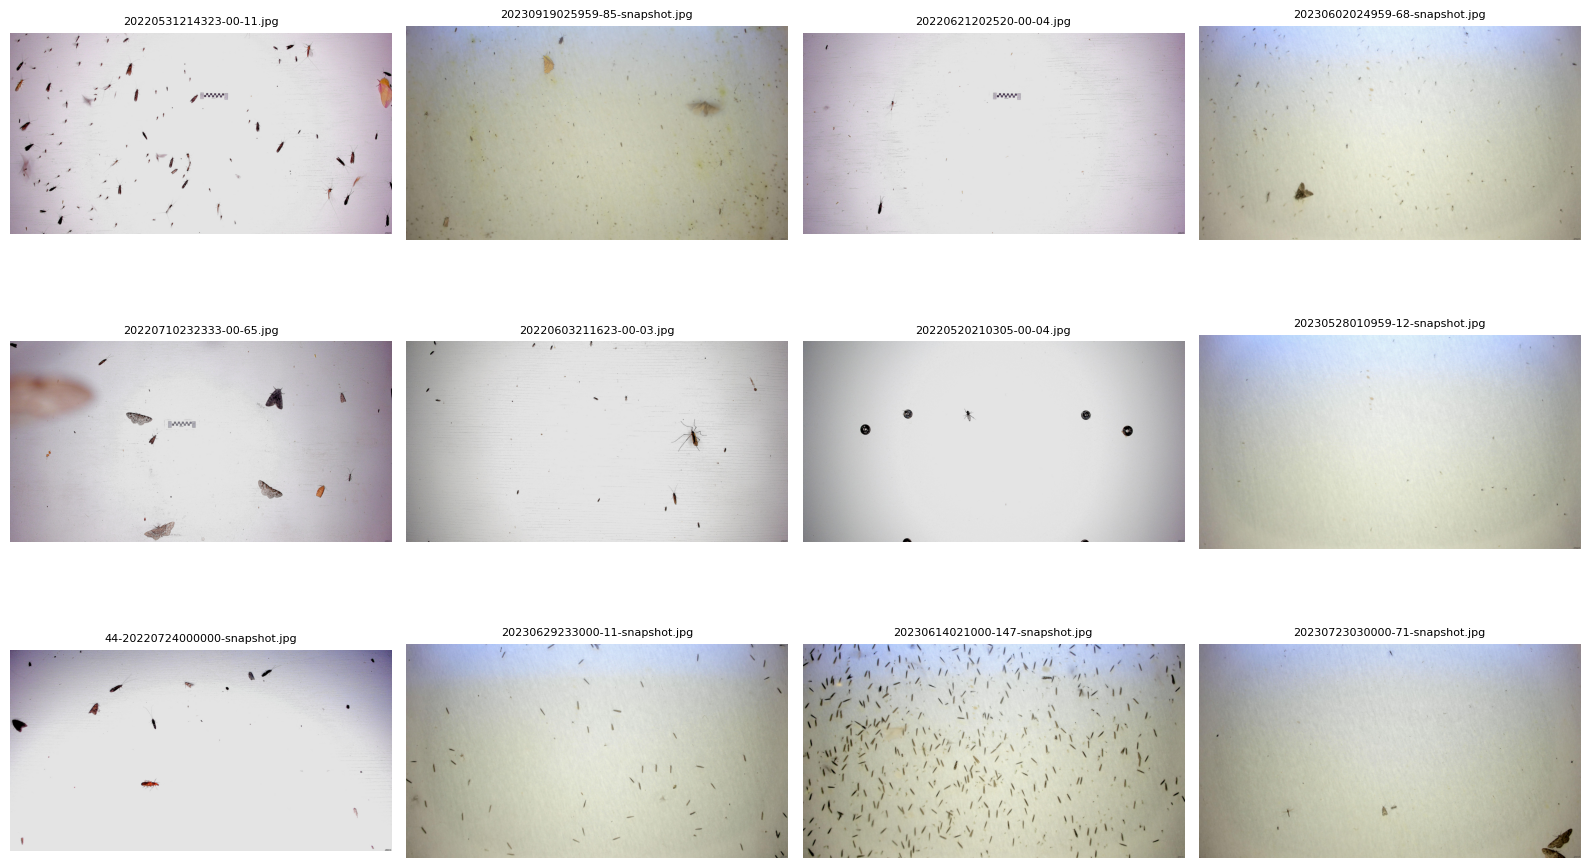

In [10]:
def show_random_images(image_list, n_rows=3, n_cols=4):
    """Display a grid of random images."""
    plt.figure(figsize=(16, 10))
    for i in range(n_rows * n_cols):
        idx = random.randint(0, len(image_list) - 1)
        img_path = image_list[idx]
        try:
            img = mpimg.imread(img_path)
            plt.subplot(n_rows, n_cols, i + 1)
            plt.imshow(img)
            plt.title(os.path.basename(img_path), fontsize=8)
            plt.axis("off")
        except Exception:
            continue
    plt.tight_layout()
    plt.show()

show_random_images(image_paths)

## Analyze image dimensions (dunno if this matters)

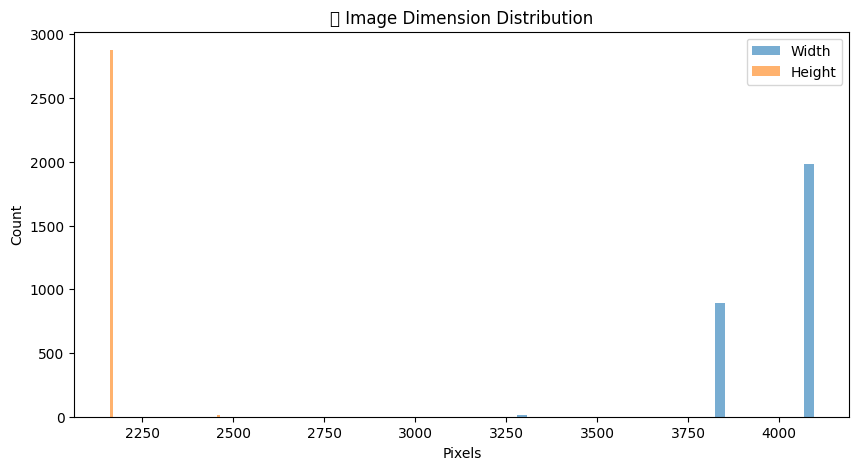

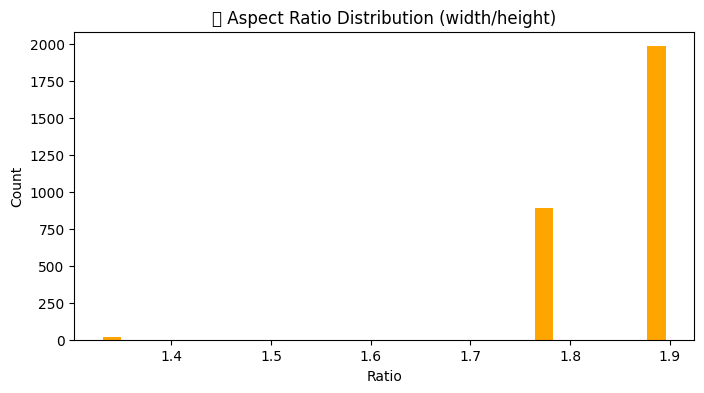

In [11]:
dims = []
for path in image_paths:
    try:
        with Image.open(path) as im:
            dims.append(im.size)  # (width, height)
    except:
        continue

if dims:
    widths, heights = zip(*dims)
    plt.figure(figsize=(10, 5))
    plt.hist(widths, bins=30, alpha=0.6, label='Width')
    plt.hist(heights, bins=30, alpha=0.6, label='Height')
    plt.title("📏 Image Dimension Distribution")
    plt.xlabel("Pixels")
    plt.ylabel("Count")
    plt.legend()
    plt.show()

    aspect_ratios = [w/h for w, h in dims]
    plt.figure(figsize=(8, 4))
    plt.hist(aspect_ratios, bins=30, color='orange')
    plt.title("🧮 Aspect Ratio Distribution (width/height)")
    plt.xlabel("Ratio")
    plt.ylabel("Count")
    plt.show()